In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load campaign data
df = pd.read_excel('marketing_campaign_v2.xlsx')

In [3]:
# Print Head
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response_actual,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


In [4]:
# Check for null data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response_actual         0
Complain                0
dtype: int64

In [5]:
# Fill the null values with mean for Income column
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [6]:
# Create age variable from year of birth
df['Age'] = 2024 - df['Year_Birth']  # Assuming current year is 2024

In [7]:
# Verify null values again
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response_actual        0
Complain               0
Age                    0
dtype: int64

In [8]:
# Percentage of people educated by category
x=df.Education.value_counts()
fig=px.pie(df,values=x,names=x.index,title='Education')
fig.show()

In [9]:
# Relationship status
x=df.Marital_Status.value_counts()
fig=px.pie(df,values=x,names=x.index,title='Martial Status')
fig.show()

In [10]:
# Response rate by age group
fig = px.histogram(df, x="Age", color="Response_actual")
fig.update_layout(title="Response Rate by Age Group")
fig.show()

In [11]:
# Purchase frequency by income level
fig = px.box(df, y="Income", x="NumStorePurchases")
fig.update_layout(title="Purchase Frequency by Income")
fig.show()

In [12]:
# Logistic regression to predict response rate with significant factors and coefficients
X = df[['Age', 'Income', 'NumCatalogPurchases', 'NumStorePurchases', 'Kidhome', 'Recency']]
X = X.fillna(X.mean())
y = df['Response_actual']

model = LogisticRegression()
model.fit(X, y)

print('Predicted response rate:', model.predict(X).mean())

Predicted response rate: 0.060267857142857144


In [13]:
# Print important coefficients and their significance
print('Logistic Regression Coefficients:')
for name, coef in zip(X.columns, model.coef_.flatten()):  # Flatten the array
    print(f'{name}: {coef:.4f}')


# Age:  A slightly negative coefficient (-0.0330) suggests a weak negative relationship between age and response.
#       As age increases, the model might predict a slightly lower probability of responding.

# Income: A zero coefficient (0.0000) indicates no statistically significant relationship between income and response according to this model.

# NumCatalogPurchases:  A positive coefficient (0.2248) suggests a positive relationship between the number of catalog purchases and response.
#                       As the number of catalog purchases increases, the model predicts a higher probability of responding.
#                       This might indicate that customers who purchase from catalogs are more likely to respond to marketing campaigns.

# NumStorePurchases:  A negative coefficient (-0.0380) suggests a weak negative relationship between the number of store purchases and response.
#                     This could be due to various reasons, such as store purchases already fulfilling customer needs, or a different customer segment frequenting stores compared to those who respond to campaigns.

# Kidhome:  A negative coefficient (-0.0774) suggests a weak negative relationship between having children at home and response.
#           However, the magnitude is small, so the interpretation might not be very strong.

# Recency:  A negative coefficient (-0.0066) suggests a weak negative relationship between the recency of a customer's purchase and response.

Logistic Regression Coefficients:
Age: -0.0330
Income: 0.0000
NumCatalogPurchases: 0.2248
NumStorePurchases: -0.0380
Kidhome: -0.0774
Recency: -0.0066


In [14]:
# Print overall model performance
y_pred = model.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred):.4f}')
print(f'F1 Score: {f1_score(y, y_pred):.4f}')
print(f'Confusion Matrix:\n{confusion_matrix(y, y_pred)}')

Accuracy: 0.7875
F1 Score: 0.2040
Confusion Matrix:
[[1703   74]
 [ 402   61]]


In [15]:
# Prediction Model: Campaign Conversions (average conversions per cluster)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df[['Age', 'Income', 'NumCatalogPurchases']]
X = X.fillna(X.mean())
X_scaled = scaler.fit_transform(X)
y = df['Response_actual']

# Retrain the model with scaled features
model.fit(X_scaled, y)

model = LogisticRegression()
model.fit(X, y)
print('Expected campaigns till conversion:', 1/model.predict_proba(X)[:,1].mean())

Expected campaigns till conversion: 4.441816682978153


In [16]:
# Predict conversion probability for each customer on an average
y_proba = model.predict_proba(X)[:, 1]  # Probability of responding (positive class)
print(y_proba.mean())

0.22513310912451234


In [17]:
# Cluster customers
kmeans = KMeans(n_clusters=5).fit(X)
df['segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [18]:
# Average expected campaigns till conversion for each cluster
df['expected_conversions'] = 1 / y_proba
print(df.groupby('segment')['expected_conversions'].mean())

segment
0    5.004614
1    7.514805
2    1.000002
3    3.481833
4    6.622456
Name: expected_conversions, dtype: float64


In [19]:
# Response prediction model performance using cross-validation
from sklearn.model_selection import cross_validate
scores = cross_validate(model, X, y, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [20]:
# Print average scores
print('Average Cross Validation Scores:')
print(f'Accuracy: {scores["test_accuracy"].mean():.4f}')
print(f'Precision: {scores["test_precision"].mean():.4f}')
print(f'Recall: {scores["test_recall"].mean():.4f}')
print(f'F1 Score: {scores["test_f1"].mean():.4f}')

Average Cross Validation Scores:
Accuracy: 0.7951
Precision: 0.5357
Recall: 0.1037
F1 Score: 0.1730


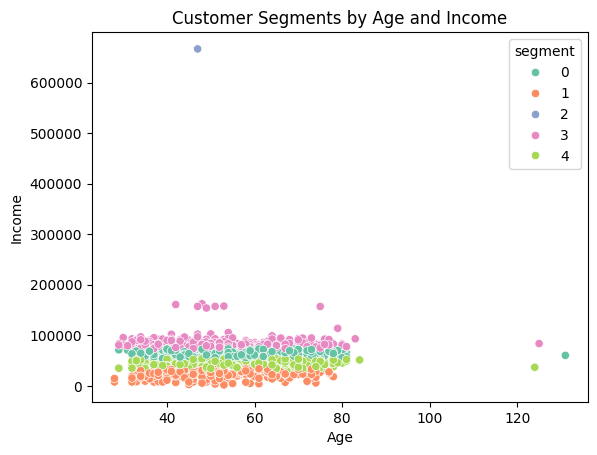

In [21]:
# Cluster visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x="Age",
    y="Income",
    hue="segment",
    palette="Set2",
    data=df,
)
plt.title('Customer Segments by Age and Income')
plt.show()


In [22]:
# Applying Random Forest as Logistic Regression cannot handle all features to identify cluster-wise segmentation

from sklearn.ensemble import RandomForestClassifier

# Loop through clusters and build models
cluster_models = {}
for cluster in df['segment'].unique():
  cluster_data = df[df['segment'] == cluster]
  X_cluster = cluster_data[['Age', 'Income', 'NumCatalogPurchases']]  # Assuming these features
  y_cluster = cluster_data['Response_actual']

  # Create and fit a Random Forest model
  model = RandomForestClassifier()
  model.fit(X_cluster, y_cluster)

  # Store the model for the current cluster
  cluster_models[cluster] = model

# for example, print feature importances for cluster 1 model:
print(cluster_models[1].feature_importances_)

# Predicting with Cluster Models (assuming new data with cluster assignments)
new_data = pd.DataFrame({'Age': [85], 'Income': [80000], 'NumCatalogPurchases': [10]})  # Example data
cluster = 3  # Assuming assigned cluster

# Use the model for the assigned cluster to predict
predicted_response = cluster_models[cluster].predict(new_data)[0]

print(f"Predicted response for new data (cluster {cluster}): {predicted_response}")

[0.33036133 0.58887068 0.080768  ]
Predicted response for new data (cluster 3): 1
